In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

font = {'family': 'sans-serif', 'serif' : 'Helvetica',
        'size'   : 25}
plt.rc('font', **font)

In [2]:
import os
storage = os.environ['MICOM_EXP'] + 'setA_mono_simTime144h/' # on Peregrine
storage

run_status_file = storage + "run_status.tsv"
run_status = pd.read_csv(run_status_file, sep="\t")

rep_simID_dict = run_status.loc[run_status['program_log_doneSim']==1, ['rep_name', 'simID']].groupby('rep_name')['simID'].apply(list).to_dict()
rep_simID_dict

rep_name_list = list(rep_simID_dict.keys())
rep_name_list

media = ['EU_avg', 'DACH', 'diabetes2', 
         'gluten_free', 'high_fat', 'high_fiber', 
         'high_protein', 'mediterranean', 'unhealthy', 
         'vegan', 'vegetarian']

replicates = rep_name_list
speciesID='setA_6'
simID = "setA_6_plastic"

In [3]:
def metaprod_normalization(row):
    production_denominator = row[row >= 0].sum()
    consumption_denominator = row[row < 0].sum()
    
    normalized = []
    for r in row:
        if r >= 0.0:
            n = r/production_denominator if (production_denominator != 0.0) else r
        else:
            n = r/consumption_denominator*(-1) if (consumption_denominator != 0.0) else r
        normalized.append(n)
    return normalized

# Batch

In [4]:
rep='rep1'
culture_type='batch'
m='DACH'

data_dir = storage + rep + '/v2.10.0_sim_' + simID + '/experiments/' + culture_type + '_mono-culture/'  + m + '/'
data_file = data_dir + 'species_metabolite_production.tsv'

metapro = pd.read_csv(data_file, sep="\t", index_col='time').drop('species_name', axis=1).iloc[:, :-1]
print(metapro.shape)

# Remove metabolites with zero production/consumption
metapro = metapro.loc[:, metapro.sum()!=0.0]
print(metapro.shape)
metapro.head()

(50, 155)
(50, 52)


1,2-Diacyl-sn-glycerol (dioctadecanoyl, n-C18:0)  \
time                                                         
0.000000                                         -0.000003   
0.029667                                         -0.000004   
0.053667                                         -0.000005   
0.090478                                         -0.000008   
0.134664                                         -0.000014   

          meso-2,6-Diaminoheptanedioate  4-Aminobenzoate       acetate  \
time                                                                     
0.000000                  -1.183730e-07        -0.000002  5.087790e-22   
0.029667                  -1.701170e-07        -0.000002  7.311790e-22   
0.053667                  -2.281170e-07        -0.000003  9.804710e-22   
0.090478                  -3.577480e-07        -0.000005  1.537640e-21   
0.134664                  -6.139740e-07        -0.000008  2.638920e-21   

          N-acetyl-D-glucosamine       AMP  L-argininium(1+)   calcium(2+)  \
time                                                                         
0.000000               -0.000013 -0.000007         -0.000014 -5.203730e-07   
0.029667               -0.000019 -0.000010         -0.000020 -7.478410e-07   
0.053667               -0.000025 -0.000013         -0.000026 -1.002810e-06   
0.090478               -0.000039 -0.000021         -0.000041 -1.572680e-06   
0.134664               -0.000068 -0.000036         -0.000071 -2.699060e-06   

          L-cysteinylglycine      Chloride  ...       sulfate  Succinate  \
time                                        ...                            
0.000000       -5.203730e-07 -5.203730e-07  ... -5.203730e-07   0.000252   
0.029667       -7.478410e-07 -7.478410e-07  ... -7.478410e-07   0.000363   
0.053667       -1.002810e-06 -1.002810e-06  ... -1.002810e-06   0.000486   
0.090478       -1.572680e-06 -1.572680e-06  ... -1.572680e-06   0.000763   
0.134664       -2.699060e-06 -2.699060e-06  ... -2.699060e-06   0.001309   

          Sucrose       Thiamin  L-threonine     Thymidine  L-tyrosine  \
time                                                                     
0.000000      0.0 -5.203730e-07    -0.000012 -9.287110e-07   -0.000008   
0.029667      0.0 -7.478410e-07    -0.000018 -1.334670e-06   -0.000011   
0.053667      0.0 -1.002810e-06    -0.000024 -1.789720e-06   -0.000015   
0.090478      0.0 -1.572680e-06    -0.000037 -2.806760e-06   -0.000024   
0.134664      0.0 -2.699060e-06    -0.000064 -4.817020e-06   -0.000040   

           Uridine  L-valine          Zinc  
time                                        
0.000000 -0.000004 -0.000018 -5.203730e-07  
0.029667 -0.000005 -0.000026 -7.478410e-07  
0.053667 -0.000007 -0.000035 -1.002810e-06  
0.090478 -0.000011 -0.000054 -1.572680e-06  
0.134664 -0.000018 -0.000093 -2.699060e-06  

[5 rows x 52 columns]

In [5]:
normalized = metapro.apply(metaprod_normalization, axis=1)
normalized_df = pd.DataFrame(normalized.to_list())
normalized_df.set_index(metapro.index, drop=True, inplace=True)
normalized_df.columns = metapro.columns

normalized_df.head()

1,2-Diacyl-sn-glycerol (dioctadecanoyl, n-C18:0)  \
time                                                         
0.000000                                         -0.002393   
0.029667                                         -0.002393   
0.053667                                         -0.002393   
0.090478                                         -0.002393   
0.134664                                         -0.002393   

          meso-2,6-Diaminoheptanedioate  4-Aminobenzoate       acetate  \
time                                                                     
0.000000                      -0.000104        -0.001371  5.526438e-19   
0.029667                      -0.000104        -0.001371  5.526441e-19   
0.053667                      -0.000104        -0.001371  5.526446e-19   
0.090478                      -0.000104        -0.001371  5.526453e-19   
0.134664                      -0.000104        -0.001371  5.526435e-19   

          N-acetyl-D-glucosamine       AMP  L-argininium(1+)  calcium(2+)  \
time                                                                        
0.000000               -0.011436 -0.006093         -0.012046    -0.000457   
0.029667               -0.011436 -0.006093         -0.012046    -0.000457   
0.053667               -0.011436 -0.006093         -0.012046    -0.000457   
0.090478               -0.011436 -0.006093         -0.012046    -0.000457   
0.134664               -0.011436 -0.006093         -0.012046    -0.000457   

          L-cysteinylglycine  Chloride  ...   sulfate  Succinate  Sucrose  \
time                                    ...                                 
0.000000           -0.000457 -0.000457  ... -0.000457   0.274192      0.0   
0.029667           -0.000457 -0.000457  ... -0.000457   0.274192      0.0   
0.053667           -0.000457 -0.000457  ... -0.000457   0.274192      0.0   
0.090478           -0.000457 -0.000457  ... -0.000457   0.274192      0.0   
0.134664           -0.000457 -0.000457  ... -0.000457   0.274192      0.0   

           Thiamin  L-threonine  Thymidine  L-tyrosine   Uridine  L-valine  \
time                                                                         
0.000000 -0.000457    -0.010755  -0.000816   -0.006849 -0.003128 -0.015749   
0.029667 -0.000457    -0.010755  -0.000816   -0.006849 -0.003128 -0.015749   
0.053667 -0.000457    -0.010755  -0.000816   -0.006849 -0.003128 -0.015749   
0.090478 -0.000457    -0.010755  -0.000816   -0.006849 -0.003128 -0.015749   
0.134664 -0.000457    -0.010755  -0.000816   -0.006849 -0.003128 -0.015749   

              Zinc  
time                
0.000000 -0.000457  
0.029667 -0.000457  
0.053667 -0.000457  
0.090478 -0.000457  
0.134664 -0.000457  

[5 rows x 52 columns]

[Text(0.5, 59.0, 'Time'), Text(131.0, 0.5, 'Metabolite')]

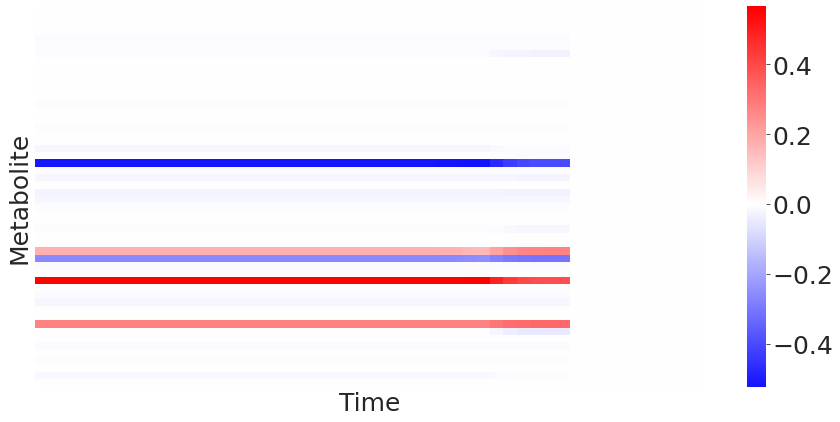

In [6]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(normalized_df.T, cmap='bwr', center=0.0, xticklabels=False, yticklabels=False, ax=ax)

ax.set(xlabel='Time', ylabel='Metabolite')

# Continuous

In [7]:
rep='rep1'
culture_type='continuous'
m='DACH'

data_dir = storage + rep + '/v2.10.0_sim_' + simID + '/experiments/' + culture_type + '_mono-culture/'  + m + '/'
data_file = data_dir + 'species_metabolite_production.tsv'

metapro = pd.read_csv(data_file, sep="\t", index_col='time').drop('species_name', axis=1).iloc[:, :-1]
print(metapro.shape)

# Remove metabolites with zero production/consumption
metapro = metapro.loc[:, metapro.sum()!=0.0]
print(metapro.shape)
metapro.head()

(6007, 155)
(6007, 64)


1,2-Diacyl-sn-glycerol (dioctadecanoyl, n-C18:0)  \
time                                                         
0.000000                                         -0.000003   
0.048000                                         -0.000005   
0.085818                                         -0.000008   
0.116992                                         -0.000011   
0.143195                                         -0.000015   

          meso-2,6-Diaminoheptanedioate  3-methyl-2-oxopentanoate  \
time                                                                
0.000000                  -1.183730e-07                       0.0   
0.048000                  -2.118310e-07                       0.0   
0.085818                  -3.350540e-07                       0.0   
0.116992                  -4.889400e-07                       0.0   
0.143195                  -6.717740e-07                       0.0   

          4-Aminobenzoate       acetate  N-acetyl-D-glucosamine  L-alanine  \
time                                                                         
0.000000        -0.000002  5.087790e-22               -0.000013        0.0   
0.048000        -0.000003  9.104720e-22               -0.000023        0.0   
0.085818        -0.000004  1.440100e-21               -0.000037        0.0   
0.116992        -0.000006  2.101520e-21               -0.000054        0.0   
0.143195        -0.000009  2.887360e-21               -0.000074        0.0   

               AMP  L-argininium(1+)  L-aspartate(1-)  ...       sulfate  \
time                                                   ...                 
0.000000 -0.000007         -0.000014              0.0  ... -5.203730e-07   
0.048000 -0.000012         -0.000025              0.0  ... -9.312190e-07   
0.085818 -0.000020         -0.000039              0.0  ... -1.472910e-06   
0.116992 -0.000029         -0.000057              0.0  ... -2.149400e-06   
0.143195 -0.000039         -0.000078              0.0  ... -2.953150e-06   

          Succinate  Sucrose       Thiamin  L-threonine     Thymidine  \
time                                                                    
0.000000   0.000252      0.0 -5.203730e-07    -0.000012 -9.287110e-07   
0.048000   0.000452      0.0 -9.312190e-07    -0.000022 -1.661950e-06   
0.085818   0.000714      0.0 -1.472910e-06    -0.000035 -2.628710e-06   
0.116992   0.001043      0.0 -2.149400e-06    -0.000051 -3.836050e-06   
0.143195   0.001433      0.0 -2.953150e-06    -0.000069 -5.270500e-06   

          L-tyrosine   Uridine  L-valine          Zinc  
time                                                    
0.000000   -0.000008 -0.000004 -0.000018 -5.203730e-07  
0.048000   -0.000014 -0.000006 -0.000032 -9.312190e-07  
0.085818   -0.000022 -0.000010 -0.000051 -1.472910e-06  
0.116992   -0.000032 -0.000015 -0.000074 -2.149400e-06  
0.143195   -0.000044 -0.000020 -0.000102 -2.953150e-06  

[5 rows x 64 columns]

In [8]:
normalized = metapro.apply(metaprod_normalization, axis=1)
normalized_df = pd.DataFrame(normalized.to_list())
normalized_df.set_index(metapro.index, drop=True, inplace=True)
normalized_df.columns = metapro.columns

normalized_df.head()

1,2-Diacyl-sn-glycerol (dioctadecanoyl, n-C18:0)  \
time                                                         
0.000000                                         -0.002393   
0.048000                                         -0.002393   
0.085818                                         -0.002393   
0.116992                                         -0.002393   
0.143195                                         -0.002393   

          meso-2,6-Diaminoheptanedioate  3-methyl-2-oxopentanoate  \
time                                                                
0.000000                      -0.000104                       0.0   
0.048000                      -0.000104                       0.0   
0.085818                      -0.000104                       0.0   
0.116992                      -0.000104                       0.0   
0.143195                      -0.000104                       0.0   

          4-Aminobenzoate       acetate  N-acetyl-D-glucosamine  L-alanine  \
time                                                                         
0.000000        -0.001371  5.526438e-19               -0.011436        0.0   
0.048000        -0.001371  5.526443e-19               -0.011436        0.0   
0.085818        -0.001371  5.526446e-19               -0.011436        0.0   
0.116992        -0.001371  5.526448e-19               -0.011436        0.0   
0.143195        -0.001371  5.526454e-19               -0.011436        0.0   

               AMP  L-argininium(1+)  L-aspartate(1-)  ...   sulfate  \
time                                                   ...             
0.000000 -0.006093         -0.012046              0.0  ... -0.000457   
0.048000 -0.006093         -0.012046              0.0  ... -0.000457   
0.085818 -0.006093         -0.012046              0.0  ... -0.000457   
0.116992 -0.006093         -0.012046              0.0  ... -0.000457   
0.143195 -0.006093         -0.012046              0.0  ... -0.000457   

          Succinate  Sucrose   Thiamin  L-threonine  Thymidine  L-tyrosine  \
time                                                                         
0.000000   0.274192      0.0 -0.000457    -0.010755  -0.000816   -0.006849   
0.048000   0.274192      0.0 -0.000457    -0.010755  -0.000816   -0.006849   
0.085818   0.274192      0.0 -0.000457    -0.010755  -0.000816   -0.006849   
0.116992   0.274192      0.0 -0.000457    -0.010755  -0.000816   -0.006849   
0.143195   0.274192      0.0 -0.000457    -0.010755  -0.000816   -0.006849   

           Uridine  L-valine      Zinc  
time                                    
0.000000 -0.003128 -0.015749 -0.000457  
0.048000 -0.003128 -0.015749 -0.000457  
0.085818 -0.003128 -0.015749 -0.000457  
0.116992 -0.003128 -0.015749 -0.000457  
0.143195 -0.003128 -0.015749 -0.000457  

[5 rows x 64 columns]

[Text(0.5, 59.0, 'Time'), Text(131.0, 0.5, 'Metabolite')]

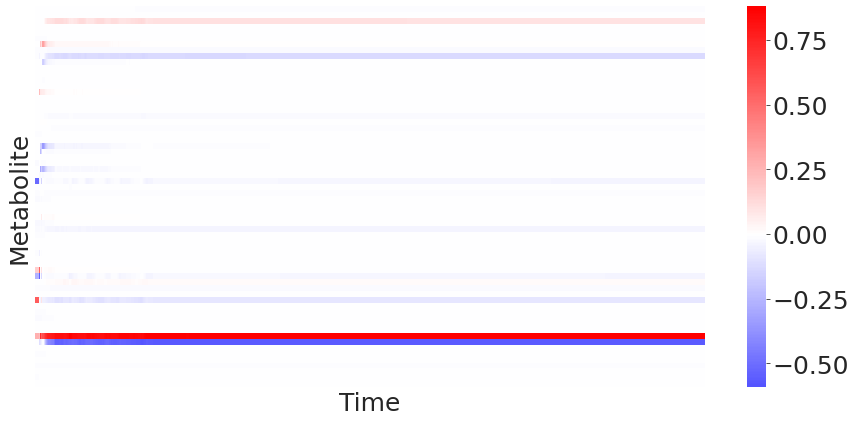

In [9]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(normalized_df.T, cmap='bwr', center=0.0, xticklabels=False, yticklabels=False, ax=ax)

ax.set(xlabel='Time', ylabel='Metabolite')

# Note

The list of metabolites are different between batch & continuous. Currently, cannot compare the two heatmaps!